## 11.2 29個のセンサーの1ヶ月間の状態別集計データの視覚化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)

# 不在情報を含めて見てみましょう
df_ratio = pd.read_csv('stacked_ratio.csv', encoding="shift_jis")
df_ratio.head()

  deviceId    不在  未活動    活動   注意  転倒
0      #01  2793  843   664   20   0
1      #02  3906  175   236    3   0
2      #03  2827  275  1042  174   2
3      #04  1046  613  2647   14   0
4      #05  1046  650  2606   17   1

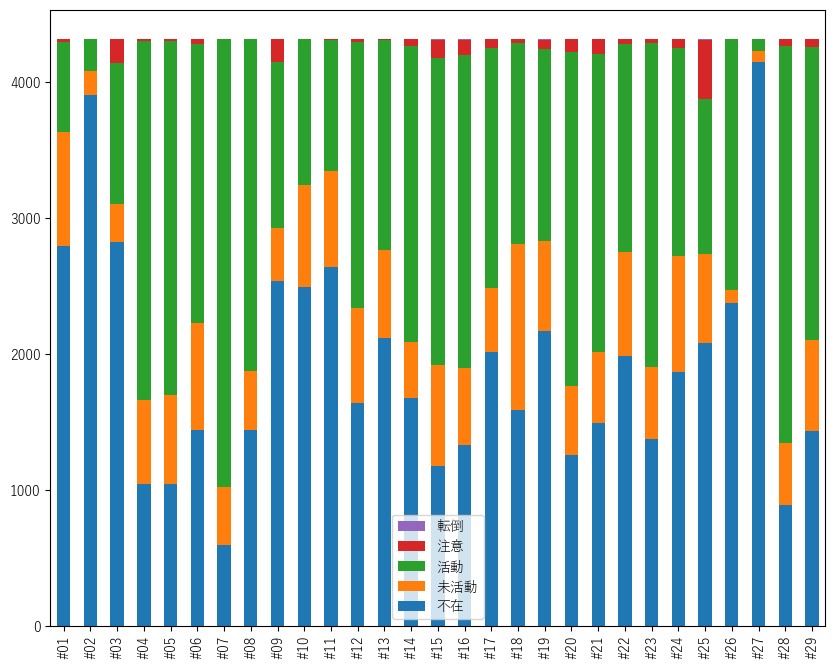

In [2]:
# plt.style.use('grayscale')
# plt.style.use('classic')
plt.rc('font', family='Yu Gothic')


plt.rcParams['figure.figsize'] = [10, 8]
ax = df_ratio.plot.bar(stacked=True)

ax.set_xticklabels(df_ratio['deviceId'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='best')  # reverse both handles and labels

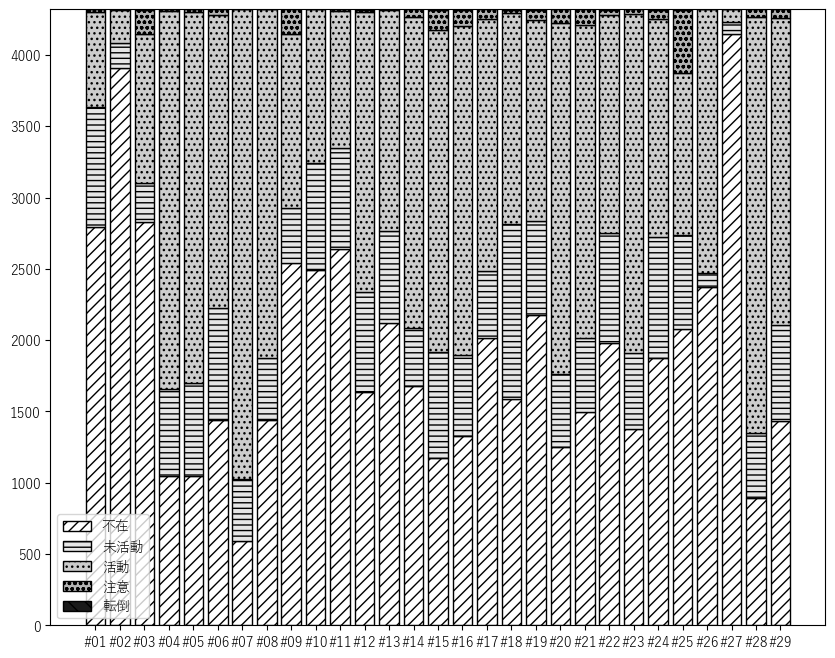

In [3]:
plt.style.use('default')
plt.rc('font', family='Yu Gothic')
plt.rcParams['figure.figsize'] = [10, 8]

deviceId = df_ratio['deviceId']
fall = df_ratio['転倒']
caution = df_ratio['注意']
action = df_ratio['活動']
non_action = df_ratio['未活動']
absent = df_ratio['不在']

plt.bar(deviceId, absent, edgecolor='black', color='w', hatch="///", label='不在')
plt.bar(deviceId, non_action, bottom=absent, edgecolor='black', color='0.9', hatch="---", label='未活動')
plt.bar(deviceId, action, bottom=absent+non_action, edgecolor='black', color='0.8', hatch="...", label='活動')
plt.bar(deviceId, caution, bottom=absent+non_action+action, edgecolor='black', color='0.7', hatch="ooo", label='注意')
plt.bar(deviceId, fall, bottom=absent+non_action+action+caution, edgecolor='black', color='0.1', hatch='\\\\', label='転倒')

plt.legend(loc='best')
plt.show()

#### 不在を０に処理し、視覚化する

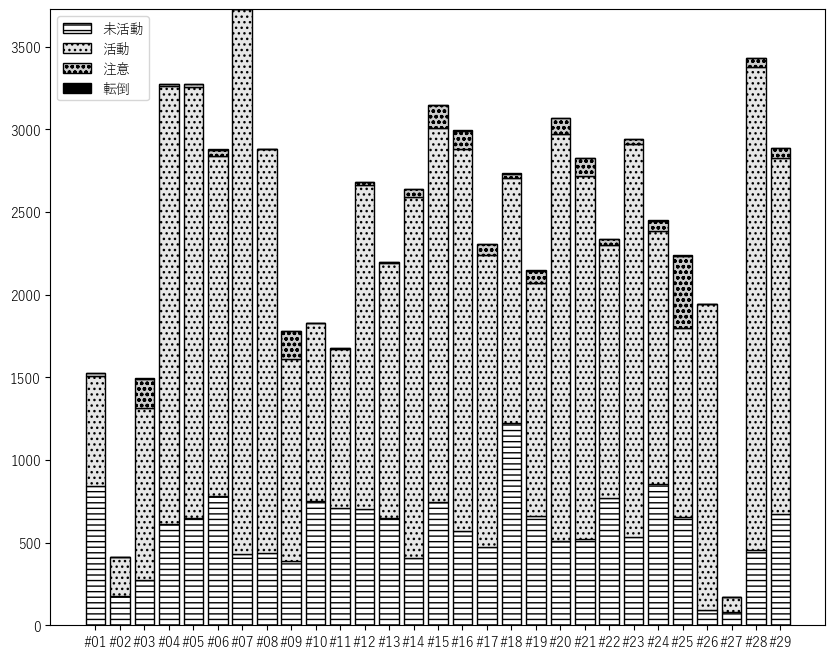

In [4]:
plt.style.use('default')
plt.rc('font', family='Yu Gothic')
plt.rcParams['figure.figsize'] = [10, 8]


# 不在情報を除いた積み上げ棒グラフを作成しましょう
df_not_absence = pd.read_csv('stacked_not_absence.csv', encoding="shift_jis")


deviceId = df_not_absence['deviceId']
fall = df_not_absence['転倒']
caution = df_not_absence['注意']
action = df_not_absence['活動']
non_action = df_not_absence['未活動']

plt.bar(deviceId, non_action, edgecolor='black', color='w', hatch="---", label='未活動')
plt.bar(deviceId, action, bottom=non_action, edgecolor='black', color='0.9', hatch="...", label='活動')
plt.bar(deviceId, caution, bottom=non_action+action, edgecolor='black', color='0.8', hatch="ooo", label='注意')
plt.bar(deviceId, fall, bottom=non_action+action+caution, edgecolor='black', color='0', hatch='\\\\', label='転倒')

plt.legend(loc='best')
plt.show()